## Movie Recomendations
This is a part of Kaggle competion. The data contain metadata for all 45,000 movies listed in the Full **MovieLens** Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

### Import Libraries

In [36]:
from imp import reload
import prepare_data
reload(prepare_data)
from prepare_data import *

### Import data

The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

In [23]:
tmdb_5000_movies, tmdb_5000_credits, links_small,ratings_small, movies_metadata, keywords, credits, links = get_data()

/anaconda3/envs/envPy36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Fix for the json coloumns

In [4]:
json_columns_1 = ['belongs_to_collection', 'genres','spoken_languages',
                'keywords', 'production_countries','production_companies']
json_columns_2 = ["keywords"]
json_columns_3 = ['cast', 'crew']
json_columns_4 = ['genres','spoken_languages',
                'keywords', 'production_countries','production_companies']

In [24]:
tmdb_5000_movies = transfer_to_json(json_columns_4, tmdb_5000_movies)

In [25]:
tmdb_5000_credits = transfer_to_json(json_columns_3, tmdb_5000_credits)

In [ ]:
#movies_metadata = transfer_to_json(json_columns_1, movies_metadata)

In [ ]:
#keywords = transfer_to_json(json_columns_2, keywords)

In [ ]:
#credits = transfer_to_json(json_columns_3, credits)

### Explore data

In [7]:
print('movies_metadata: ',movies_metadata.columns)
print('\n keywords: ',keywords.columns)
print('\n credits: ',credits.columns)
print('\n links_small: ',links_small.columns)
print('\n ratings_small: ',ratings_small.columns)

movies_metadata:  Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

 keywords:  Index(['id', 'keywords'], dtype='object')

 credits:  Index(['cast', 'crew', 'id'], dtype='object')

 links_small:  Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

 ratings_small:  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [8]:
tmdb_to_imbd_cols = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}

In [9]:
df = get_movie_details(tmdb_5000_movies, tmdb_5000_credits, tmdb_to_imbd_cols)

/Users/hamed/maryam/Movie_recommendations/src/prepare_data.py:49: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
/Users/hamed/maryam/Movie_recommendations/src/prepare_data.py:69: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [10]:
df.head(2)

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,tagline,movie_title,vote_average,num_voted_users,country,director_name,actor_1_name,actor_2_name,actor_3_name,title_year
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,United States of America,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang,2009.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,United States of America,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård,2007.0


In [11]:
keywords['keywords'].apply(pipe_flatten_names2)

0        jealousy|toy|boy|friendship|friends|rivalry|bo...
1        board game|disappearance|based on children's b...
2         fishing|best friend|duringcreditsstinger|old men
3        based on novel|interracial relationship|single...
4        baby|midlife crisis|confidence|aging|daughter|...
                               ...                        
46414                                          tragic love
46415                                    artist|play|pinoy
46416                                                     
46417                                                     
46418                                                     
Name: keywords, Length: 46419, dtype: object

### Word Count

In [12]:
set_keywords = get_all_keywords(df,'plot_keywords', '|')

In [13]:
count_keywords = count_word(df,'plot_keywords' ,set_keywords,'|')

In [14]:
count_keywords['woman director']

324

### Missing Data

In [15]:
missing = df.isnull().sum().reset_index()
missing.columns = ['Feature','Num missing']
missing[missing['Num missing'] > 0]

,Feature,Num missing
2,homepage,3091
5,language,86
7,overview,3
11,release_date,1
13,duration,2
16,tagline,844
20,country,174
21,director_name,30
22,actor_1_name,53
23,actor_2_name,63


### Genres

In [16]:
set_keywords_genres = get_all_keywords(df,'genres', '|')

In [17]:
count_keywords_genres = count_word(df,'genres' ,set_keywords_genres,'|')

In [18]:
(pd.Series(count_keywords_genres)).reset_index().head()

,index,0
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894


In [26]:
tmdb_5000_credits.columns = ['id', 'title', 'cast', 'crew']

In [27]:
df2 = tmdb_5000_movies.merge(tmdb_5000_credits, on = 'id')

 ## **Metric to score or rate movie:** IMDB's weighted rating (wr)
 
It is given as:

![alt text](weightingrate.png)

In [28]:
df2['score'] = IMDB_weighted_rating(df2, 'vote_count', 'vote_average')

In [29]:
df2 = df2.sort_values('score', ascending=False)

In [30]:
df2[['original_title', 'vote_count', 'vote_average', 'score']].head(2)

,original_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256


### Movie Popularities

Text(0, 0.5, 'Popularity')

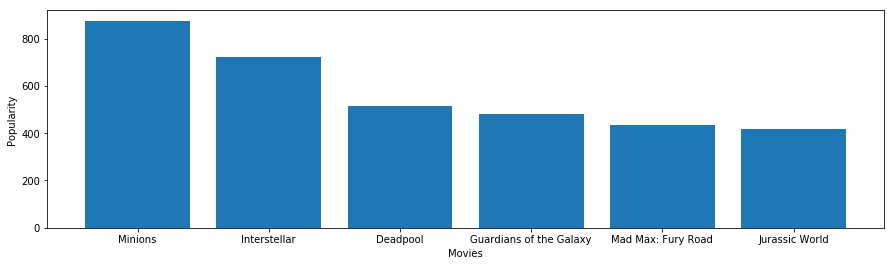

In [31]:
top = df2.sort_values('popularity', ascending=False)
plt.figure(figsize=(15,4))
plt.bar(top['original_title'].head(6),
       top['popularity'].head(6))
plt.xlabel('Movies')
plt.ylabel('Popularity')

## Content Based Filtering

### Recommendations using "Overview" variable: 

[Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.

In [32]:
df2['overview'].fillna('', inplace = True)

In [33]:
tfidf = TfidfVectorizer(stop_words='english') #Remove all english stop words such as 'the', 'a'
tfidf_matrix = tfidf.fit_transform(df2['overview'])
cos_similarity = cosine_similarity(tfidf_matrix)

In [37]:
get_recommendations('The Dark Knight Rises', cos_similarity, df= df2)

,index,original_title
0,3526,The Sting
1,3194,All or Nothing
2,3466,Sliding Doors
3,4624,Locker 13
4,2917,The Fighter
5,4036,Antibirth
6,3491,The Wackness
7,2849,Nebraska
8,3504,11:14
9,3346,Jumping the Broom


### Recommendations using the director's name:

In [52]:
tfidf = TfidfVectorizer(stop_words='english') #Remove all english stop words such as 'the', 'a'
df['director_name'].fillna('', inplace = True)
tfidf_matrix2 = tfidf.fit_transform(df['director_name'])

In [53]:
get_recommendations('The Dark Knight Rises', cosine_sim=cosine_similarity(tfidf_matrix2), df = df)

,index,original_title
0,65,The Dark Knight
1,95,Interstellar
2,96,Inception
3,119,Batman Begins
4,1033,Insomnia
5,1196,The Prestige
6,3573,Memento
7,0,Avatar
8,1,Pirates of the Caribbean: At World's End
9,2,Spectre


### Recommendations using the following features:
- the 3 top actors,
- the director,
- related genres
- and the movie plot keywords

In [88]:
df[['actor_1_name','actor_2_name','actor_3_name','director_name','plot_keywords','genres']].head(3)

,actor_1_name,actor_2_name,actor_3_name,director_name,plot_keywords,genres
0,zoesaldana,sigourneyweaver,stephenlang,jamescameron,cultureclash|future|spacewar|spacecolony|socie...,action|adventure|fantasy|sciencefiction
1,orlandobloom,keiraknightley,stellanskarsgård,goreverbinski,ocean|drugabuse|exoticisland|eastindiatradingc...,adventure|fantasy|action
2,christophwaltz,léaseydoux,ralphfiennes,sammendes,spy|basedonnovel|secretagent|sequel|mi6|britis...,action|adventure|crime


In [41]:
for col in [ 'actor_1_name','actor_2_name','actor_3_name','director_name','plot_keywords','genres']:
    df[col].fillna('', inplace = True) 

In [43]:
features = ['actor_1_name','actor_2_name','actor_3_name','director_name','plot_keywords','genres']

In [44]:
for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [83]:
df['group_features'] = df.apply(group_features, axis=1)

In [90]:
tfidf = TfidfVectorizer(stop_words='english') #Remove all english stop words such as 'the', 'a'
df['group_features'].fillna('', inplace = True)
tfidf_matrix3 = tfidf.fit_transform(df['group_features'])

In [91]:
get_recommendations('The Dark Knight Rises', cosine_sim=cosine_similarity(tfidf_matrix3), df = df)

,index,original_title
0,65,The Dark Knight
1,119,Batman Begins
2,1359,Batman
3,210,Batman & Robin
4,428,Batman Returns
5,1043,Miss Congeniality
6,1740,Kick-Ass 2
7,9,Batman v Superman: Dawn of Justice
8,95,Interstellar
9,3819,Defendor


In [92]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['group_features'])

In [93]:
get_recommendations('The Dark Knight Rises', cosine_sim=cosine_similarity(count_matrix), df = df)

,index,original_title
0,65,The Dark Knight
1,119,Batman Begins
2,4638,Amidst the Devil's Wings
3,3819,Defendor
4,210,Batman & Robin
5,3359,In Too Deep
6,1740,Kick-Ass 2
7,1503,Takers
8,1986,Faster
9,2793,The Killer Inside Me


### Collaborative Filtering using SVD

Singular Value Decomposition, or SVD, has a wide array of applications. These include dimensionality reduction, image compression, and denoising data. In essence, SVD states that a matrix can be represented as the product of three other matrices. For more information please see [here](https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0).

In [133]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [141]:
data = Dataset.load_from_df(
    ratings_small[['userId','movieId','rating']],
    reader=Reader()
)

In [142]:
data.df[data.df['userId'] == 1].head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [149]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
grid_model = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

grid_model.fit(data)

# best RMSE score
print(grid_model.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(grid_model.best_params['rmse'])

0.9143614161704493
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [152]:
# We can now use the algorithm that yields the best rmse:
algo = grid_model.best_estimator['rmse']
algo = algo.fit(data.build_full_trainset())

In [153]:
algo.predict(uid=1,iid=31,r_ui=2.5)

Prediction(uid=1, iid=31, r_ui=2.5, est=2.739824598670386, details={'was_impossible': False})

Some references that I used:
- https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/data#Collaborative-Filtering
- https://www.kaggle.com/fabiendaniel/film-recommendation-engine
- https://surprise.readthedocs.io/en/stable/getting_started.html